In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

import seaborn as sns

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [12]:
datadir='/nagyvinyok/adat84/sotejedlik/ribli/expression/data/encode/'

data=pd.read_csv(
    datadir+'wgEncodeRegTfbsClusteredV3.bed',
    sep='\t',header=None)

data.columns=['chrom','pos1','pos2','name','val','x','y','z']
data.head()

,chrom,pos1,pos2,name,val,x,y,z
0,chr1,10073,10329,ZBTB33,354,2,"204,246","354,138"
1,chr1,10149,10413,CEBPB,201,1,343,201
2,chr1,16110,16390,CTCF,227,7,"213,612,621,627,628,631,662","110,139,171,209,227,200,170"
3,chr1,29198,29688,TAF1,184,1,157,184
4,chr1,29275,29591,GABPA,198,1,180,198


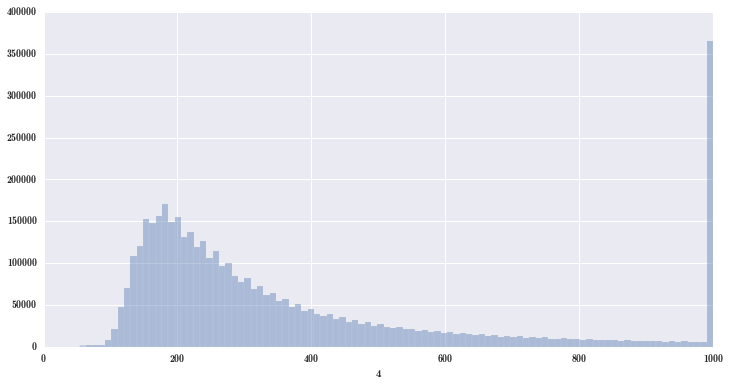

In [6]:
plt.figure(figsize=(12,6))
dump=sns.distplot(data[4],bins=100,kde=False)
#dump=plt.xlim(0.01,0.99)
#plt.ylim(0,200)

In [50]:
np.unique(data['name'])

array(['ARID3A', 'ATF1', 'ATF2', 'ATF3', 'BACH1', 'BATF', 'BCL11A', 'BCL3',
       'BCLAF1', 'BDP1', 'BHLHE40', 'BRCA1', 'BRF1', 'BRF2', 'CBX3',
       'CCNT2', 'CEBPB', 'CEBPD', 'CHD1', 'CHD2', 'CREB1', 'CTBP2', 'CTCF',
       'CTCFL', 'E2F1', 'E2F4', 'E2F6', 'EBF1', 'EGR1', 'ELF1', 'ELK1',
       'ELK4', 'EP300', 'ESR1', 'ESRRA', 'ETS1', 'EZH2', 'FAM48A', 'FOS',
       'FOSL1', 'FOSL2', 'FOXA1', 'FOXA2', 'FOXM1', 'FOXP2', 'GABPA',
       'GATA1', 'GATA2', 'GATA3', 'GRp20', 'GTF2B', 'GTF2F1', 'GTF3C2',
       'HDAC1', 'HDAC2', 'HDAC6', 'HDAC8', 'HMGN3', 'HNF4A', 'HNF4G',
       'HSF1', 'IKZF1', 'IRF1', 'IRF3', 'IRF4', 'JUN', 'JUNB', 'JUND',
       'KAP1', 'KDM5A', 'KDM5B', 'MAFF', 'MAFK', 'MAX', 'MAZ', 'MBD4',
       'MEF2A', 'MEF2C', 'MTA3', 'MXI1', 'MYBL2', 'MYC', 'NANOG', 'NFATC1',
       'NFE2', 'NFIC', 'NFYA', 'NFYB', 'NR2C2', 'NR2F2', 'NR3C1', 'NRF1',
       'PAX5', 'PBX3', 'PHF8', 'PML', 'POLR2A', 'POLR3G', 'POU2F2',
       'POU5F1', 'PPARGC1A', 'PRDM1', 'RAD21', 'RBBP5', 'RCOR

## Create some position-wise data

In [58]:
def getsum(chrom,pos1,pos2,data):
    small_data=data[(data.chrom==chrom) & (data.pos1 < pos2) 
                    & (data.pos2 > pos1)][['chrom','pos1','pos2','val']]
    
    x=np.arange(pos1,pos2)
    res=np.zeros(pos2-pos1)
    for start,end,val in zip(small_data['pos1'],small_data['pos2'],small_data['val']):
        res[start-pos1:end-pos1]+=val
        
    return x,res

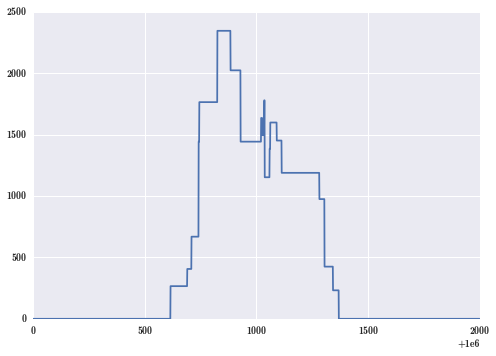

In [59]:
x,res=getsum('chr1',1000000,1002000,data)
plt.plot(x,res)

In [65]:
def get_det_sum(chrom,pos1,pos2,data):
    small_data=data[(data.chrom==chrom) & (data.pos1 < pos2) 
                    & (data.pos2 > pos1)][['chrom','name','pos1','pos2','val']]
    
    x_l,res_l=[],[]
    for name in np.unique(small_data.name):
        temp_data=small_data[small_data.name==name]
        x=np.arange(pos1,pos2)
        res=np.zeros(pos2-pos1)
        for start,end,val in zip(temp_data['pos1'],temp_data['pos2'],temp_data['val']):
            res[start-pos1:end-pos1]+=val
        x_l.append(x)
        res_l.append(res)
        
    return x_l,res_l

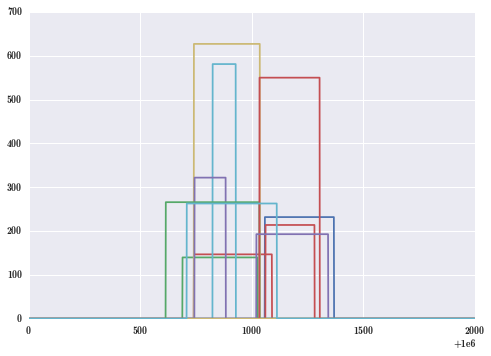

In [68]:
x_l,res_l=get_det_sum('chr1',1000000,1002000,data)
for x,res in zip(x_l,res_l):
    plt.plot(x,res)